Deep Learning Project

In [40]:
import tensorflow as tf

# Check GPU availability
if tf.test.gpu_device_name():
    print('GPU device found')
else:
    print("No GPU found")

GPU device found


In [41]:
import tensorflow as tf
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
drive.mount('/content/drive')
from keras.callbacks import EarlyStopping

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
X_tr = pd.read_csv('/content/drive/My Drive/sign_mnist_train.csv')
X_te = pd.read_csv('/content/drive/My Drive/sign_mnist_test.csv')

In [43]:
X_tr

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [44]:
X_te

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [45]:
X_train = X_tr.iloc[:, 1:].values
y_train = X_tr.iloc[:, 0].values

In [46]:
X_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [47]:
X_test = X_te.iloc[:, 1:].values
y_test = X_te.iloc[:, 0].values

In [48]:
X_train = X_train.reshape(-1, 28, 28)
X_train = np.stack([X_train] * 3, axis=-1)
X_train = tf.image.resize(X_train, [50, 50]).numpy()
X_train = X_train / 255.0
X_train.shape

(27455, 50, 50, 3)

In [49]:
X_test = X_test.reshape(-1, 28, 28)
X_test = np.stack([X_test] * 3, axis=-1)
X_test = tf.image.resize(X_test, [50, 50]).numpy()
X_test = X_test / 255.0
X_test.shape

(7172, 50, 50, 3)

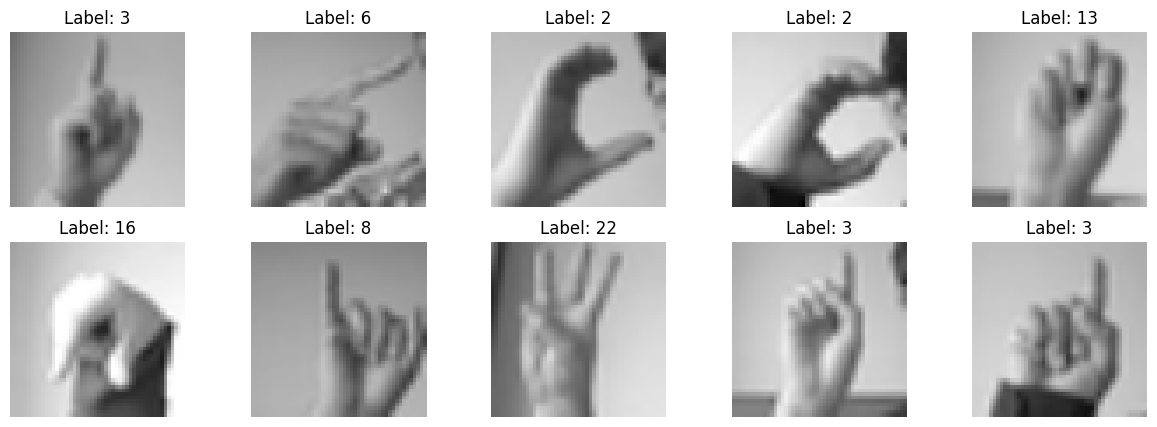

In [50]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

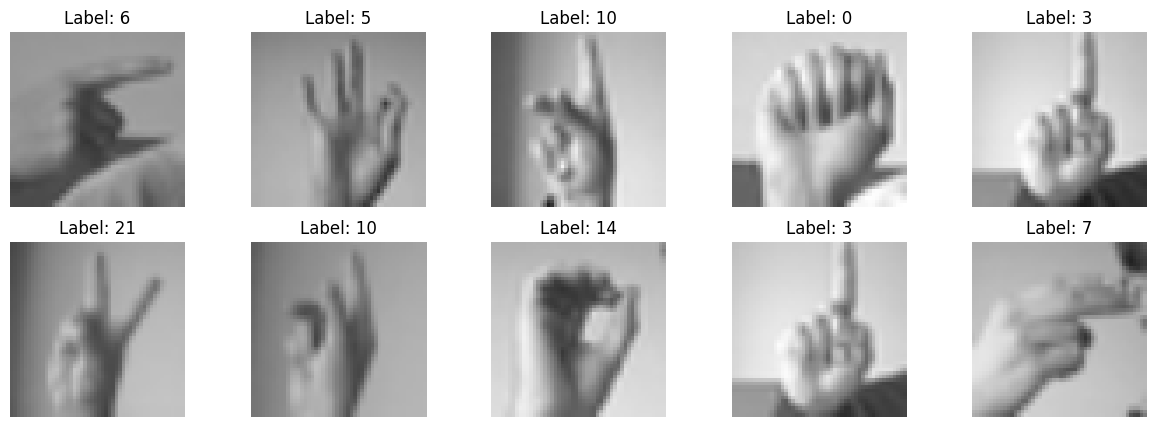

In [51]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.show()

In [52]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), kernel_initializer='he_uniform', activation='relu', input_shape=(50, 50, 3)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(25, activation='softmax')
    ])
    return cnn_model

In [53]:
cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
es = EarlyStopping(monitor='val_loss', patience=5)
BATCH_SIZE = 512
EPOCHS = 50
cnn_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[es])

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 16s 297ms/step - accuracy: 0.2135 - loss: 2.7725 - val_accuracy: 0.8465 - val_loss: 0.4655
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step - accuracy: 0.9221 - loss: 0.2489 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 253ms/step - accuracy: 0.9999 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 6.5469e-04
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 255ms/step - accuracy: 1.0000 - loss: 4.8759e-04 - val_accuracy: 1.0000 - val_loss: 2.5918e-04
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 242ms/step - accuracy: 1.0000 - loss: 2.0523e-04 - val_accuracy: 1.0000 - val_loss: 1.7642e-04
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 242ms/step - accuracy: 1.0000 - loss: 1.4626e-04 - val_accuracy: 1.0000 - val_loss: 1.3203e-04
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 244ms/step - accuracy: 1.0000 - loss: 1.1475e-04 - val_accuracy: 1.0000 - val_loss: 1.0317e-04
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 261ms/step - accura

In [55]:
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8807 - loss: 1.3905
Test Loss: 1.3626331090927124
Test Accuracy: 0.8807864189147949


In [56]:
y_pred = cnn_model.predict(X_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [57]:
y_pred_classes = np.argmax(y_pred, axis=1)

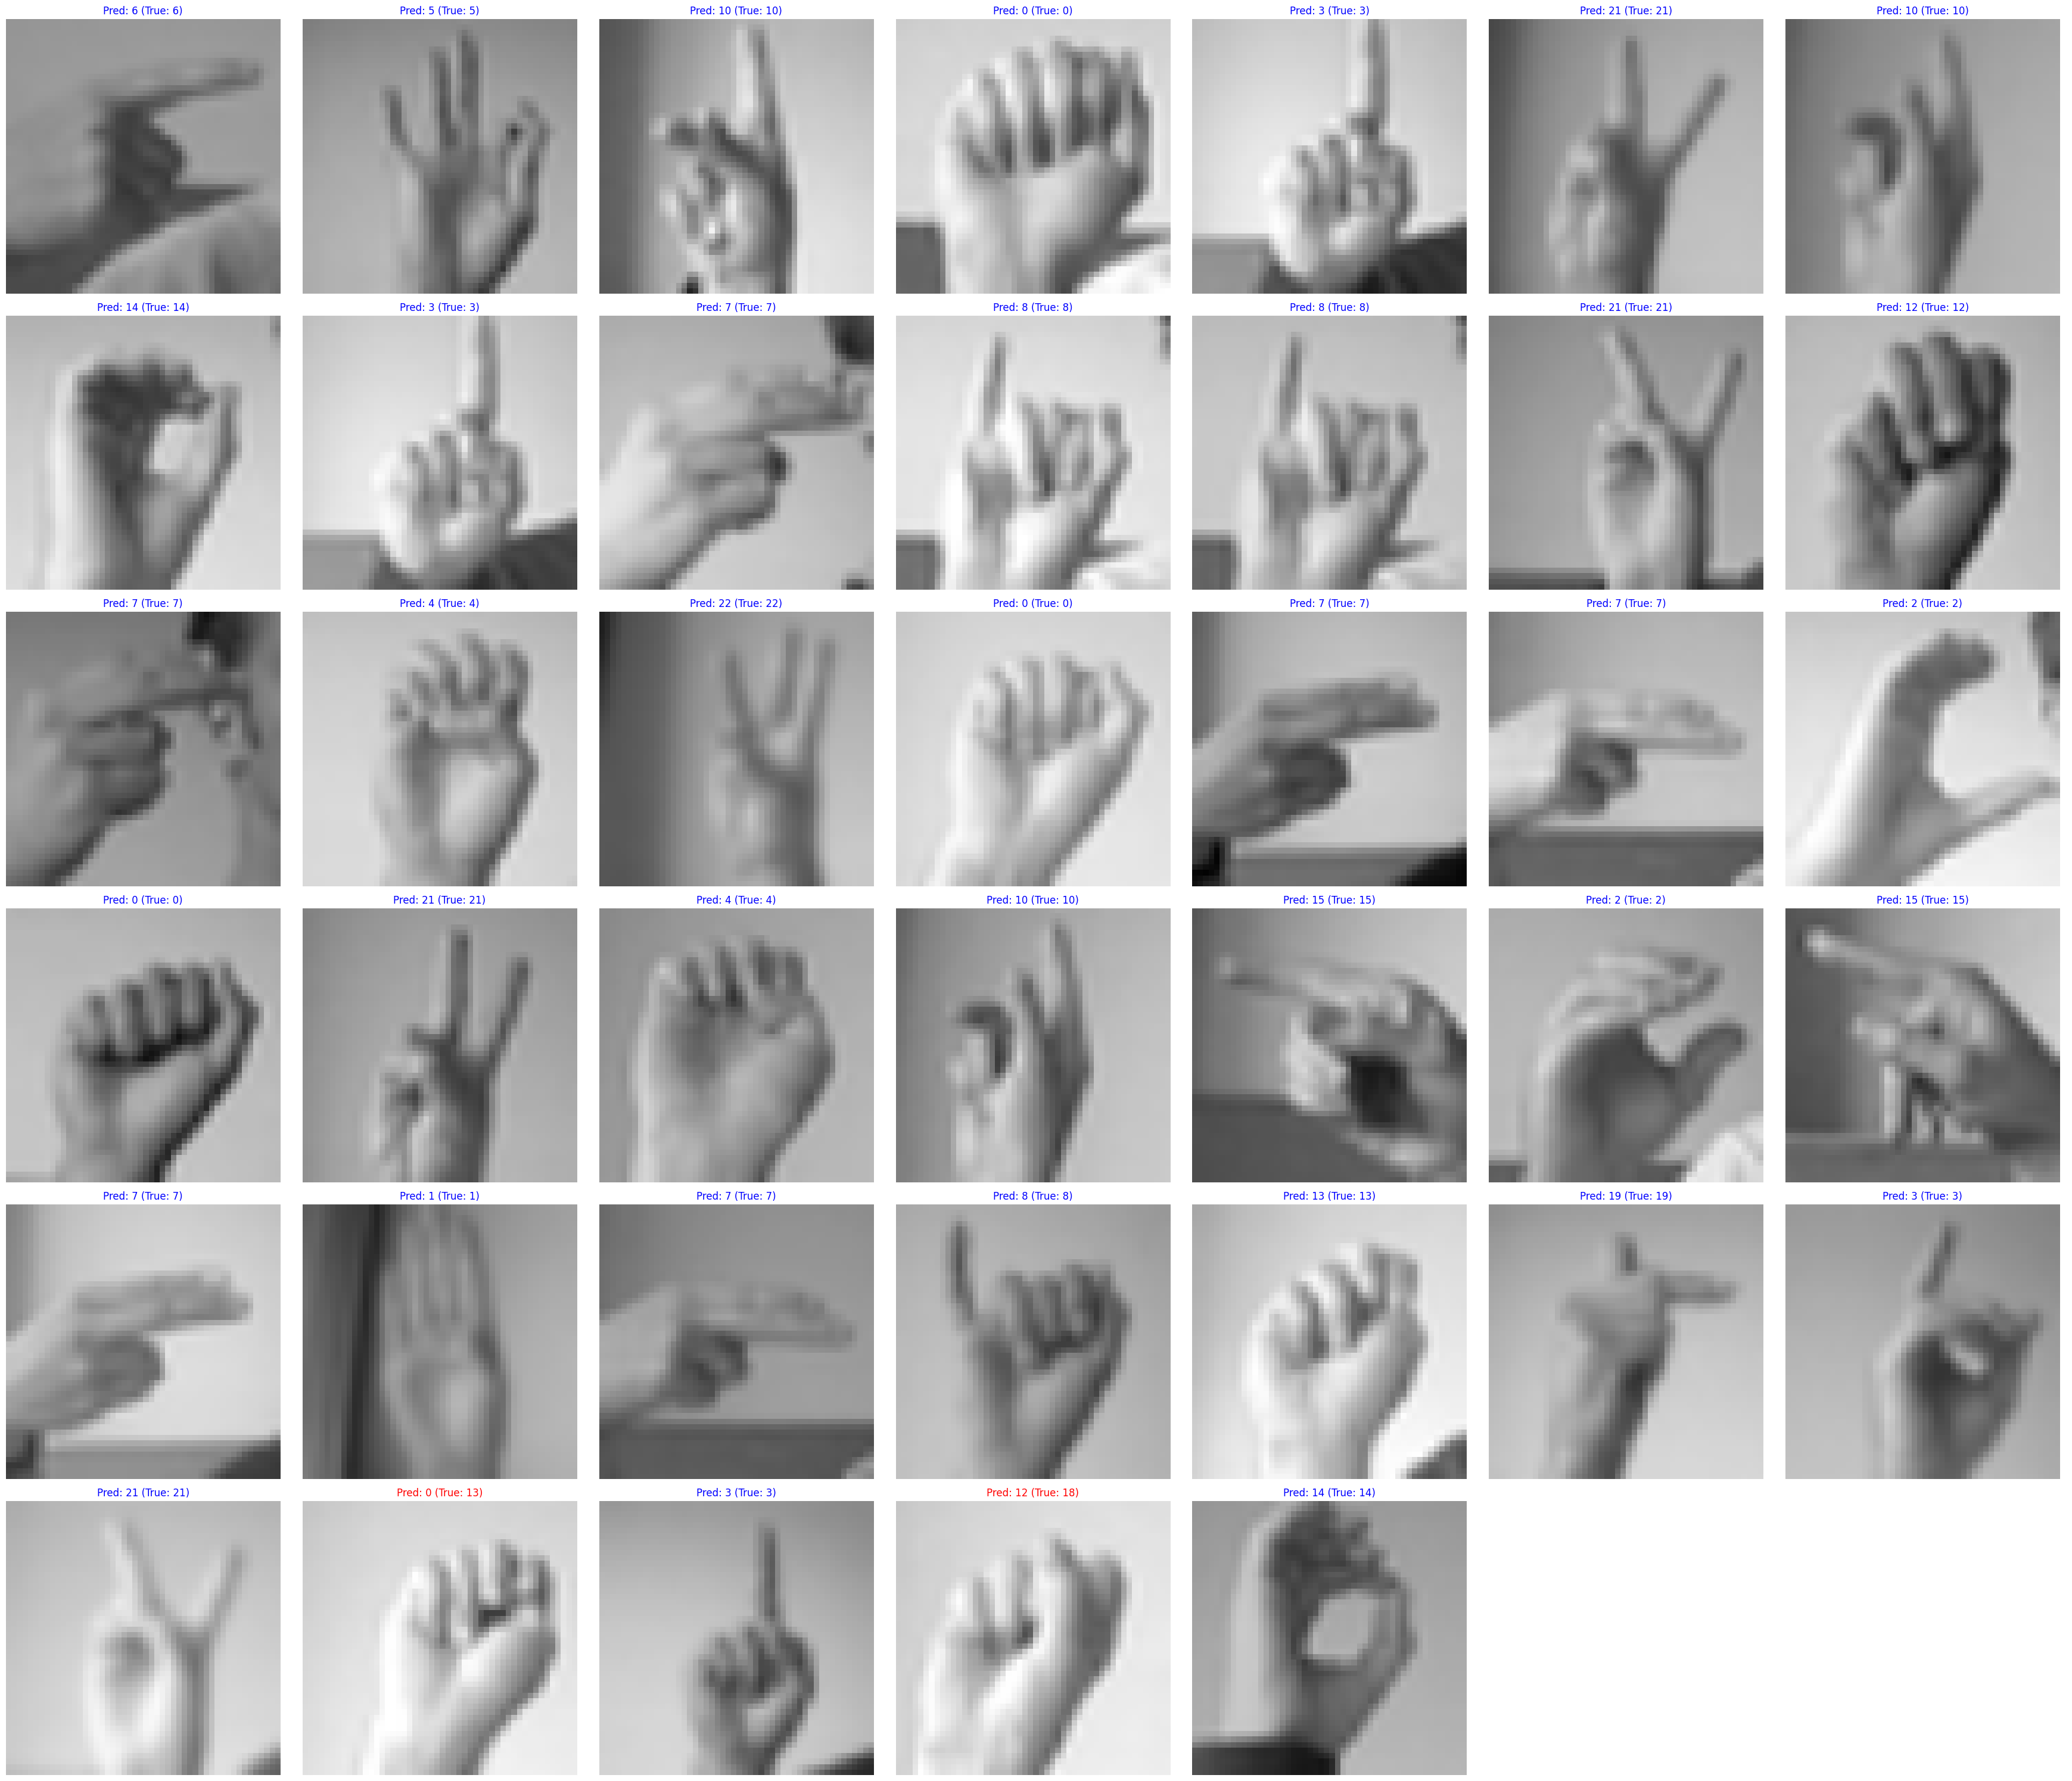

In [58]:
def plot_images(X, y_true, y_pred, n_images=7):

    n_cols = 7
    n_rows = np.ceil(n_images / n_cols).astype(int)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    axes = axes.flatten()

    for i in range(n_images):
        image = X[i]
        true_label = y_true[i]
        predicted_label = y_pred[i]

        axes[i].imshow(image)
        axes[i].axis('off')

        if true_label == predicted_label:
            color = 'blue'
        else:
            color = 'red'

        axes[i].set_title(f"Pred: {predicted_label} (True: {true_label})", color = color)

    for j in range(n_images, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_images(X_test, y_test, y_pred_classes, n_images = 40)

In [59]:
from google.colab import drive
drive.mount('/content/gdrive')
#%%shell
!jupyter nbconvert --to html '/content/gdrive/MyDrive/Colab Notebooks/DP_Project.ipynb'

Mounted at /content/gdrive
[NbConvertApp] Converting notebook /content/gdrive/MyDrive/Colab Notebooks/DP_Project.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 459461 bytes to /content/gdrive/MyDrive/Colab Notebooks/DP_Project.html
